# Exercise 3: Vectorisation of Text Data


The process of converting or transforming a data set into a set of vectors is called __Vectorization__.<br>
Using __word vectors__ is a relatively old approach of NLP. In it, the words of a sentence are processed without context, just lexically. <br>
Modern algoriths, which we will apply later in the course consider the meaning, the semantical role of the word in a sentence, which gives posibility for "undrstanding" the inforation in the document (NLU). These algiriths implement __tokens, embedding techniques and deel learning__ ANN.

In [1]:
# import libraries
import pandas as pd
import sklearn as sk
import math 
import pprint

In [2]:
# enter two sentences for the test
sent1 = "Data Science is the sexiest job of the 21st century."
sent2 = "Machine learning is the key for data science."

In [3]:
# parse the sentences in words
sent1 = sent1.split(" ")
sent2 = sent2.split(" ")

In [4]:
print(sent1)
print(sent2)

['Data', 'Science', 'is', 'the', 'sexiest', 'job', 'of', 'the', '21st', 'century.']
['Machine', 'learning', 'is', 'the', 'key', 'for', 'data', 'science.']


In [3]:
# join the sets of words to remove duplications
all = set(sent1).union(set(sent2))
print(all)

NameError: name 'sent1' is not defined

In [6]:
# corpus size
len(all)

15

## 1. Binary Vectorisation of the Sentences

Check and remember which words appear in each semntence (document).
Create two empty dictionaries, one for each document. Each dictionaire will contain 15 positions - one per word. The word will be a key, and the appearance will be a value 1 (appear) or 0 (doesn't appear).

In [7]:
# Binary Frequency Vector
def vect(sent):
    wvec = dict.fromkeys(all, 0) 
    for word in sent:
        wvec[word]=1

In [8]:
dict1 = vect(sent1)
dict1

{'of': 1,
 'key': 0,
 'job': 1,
 'science.': 0,
 'Data': 1,
 'Machine': 0,
 'learning': 0,
 'for': 0,
 'the': 1,
 'century.': 1,
 'data': 0,
 '21st': 1,
 'sexiest': 1,
 'is': 1,
 'Science': 1}

In [9]:
dict2 = vect(sent2)
dict2

{'of': 0,
 'key': 1,
 'job': 0,
 'science.': 1,
 'Data': 0,
 'Machine': 1,
 'learning': 1,
 'for': 1,
 'the': 1,
 'century.': 0,
 'data': 1,
 '21st': 0,
 'sexiest': 0,
 'is': 1,
 'Science': 0}

In [10]:
# collect the dictionaires in a data frame
df = pd.DataFrame([dict1, dict2])
df

,of,key,job,science.,Data,Machine,learning,for,the,century.,data,21st,sexiest,is,Science
0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,1
1,0,1,0,1,0,1,1,1,1,0,1,0,0,1,0


### Similarity of Two Vectors 

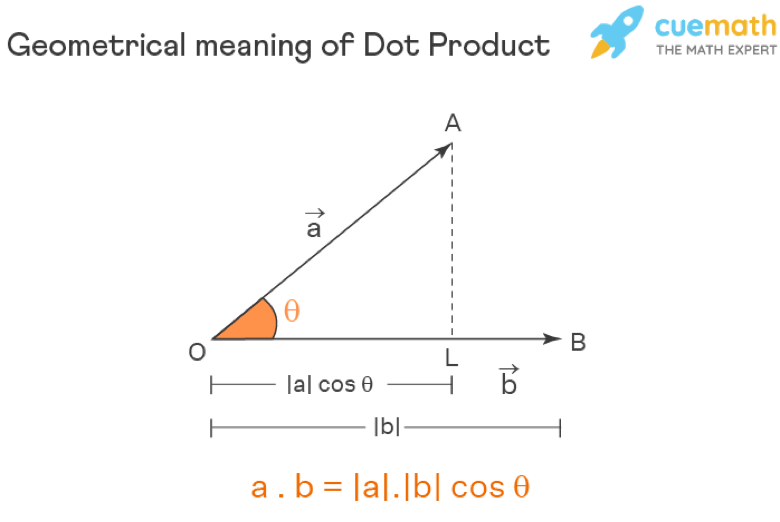

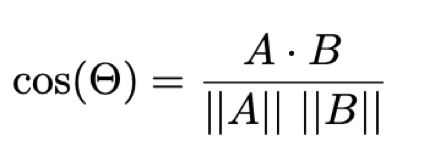 

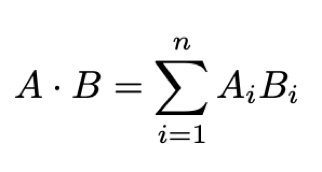

We are searching for the size of the angle: smaller angle - closer vectors - bigger similarity

In [11]:
# Calculate dot product of two vectors, divide it by the magnitudes to find the cos(angle between them)
# Use the result as a correlation coefficient 
from collections import Counter

def cosine(vector1, vector2):
    # calculate nominator as a dot product
    numerator = sum(map(lambda pair:pair[0]*pair[1],zip(vector1, vector2)))
    
    # calculate the denominator, use Euclidean norm
    sum1 = sum([vector1[i] ** 2 for i in list(vector1.keys())])
    sum2 = sum([vector2[i] ** 2 for i in list(vector2.keys())])   
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    
    if not denominator:
         return 0.0
    else:
         return float(numerator)/denominator


In [12]:
# calculate the correlation
corr = cosine(df.iloc[0], df.iloc[1])
print("Similarity: ", corr)

Similarity:  0.2357022603955158


## 2. Count Vectorisation
Consider the number of ocurancies of a word in a document. The order doesn't matter - __bag-of-words__ model (BOW)

In [13]:
# Count vector
def cvect(sent):
    wvec = dict.fromkeys(all, 0) 
    for word in sent:
        wvec[word]+=1
    return wvec    

In [14]:
dict1 = cvect(sent1)
dict1

{'of': 1,
 'key': 0,
 'job': 1,
 'science.': 0,
 'Data': 1,
 'Machine': 0,
 'learning': 0,
 'for': 0,
 'the': 2,
 'century.': 1,
 'data': 0,
 '21st': 1,
 'sexiest': 1,
 'is': 1,
 'Science': 1}

In [15]:
dict2 = cvect(sent2)
dict2

{'of': 0,
 'key': 1,
 'job': 0,
 'science.': 1,
 'Data': 0,
 'Machine': 1,
 'learning': 1,
 'for': 1,
 'the': 1,
 'century.': 0,
 'data': 1,
 '21st': 0,
 'sexiest': 0,
 'is': 1,
 'Science': 0}

In [16]:
# collect the dictionaires in a data frame
dfc = pd.DataFrame([dict1, dict2])
dfc

,of,key,job,science.,Data,Machine,learning,for,the,century.,data,21st,sexiest,is,Science
0,1,0,1,0,1,0,0,0,2,1,0,1,1,1,1
1,0,1,0,1,0,1,1,1,1,0,1,0,0,1,0


Re-calculate the similarity

In [17]:
# calculate the correlation
corr = cosine(dfc.iloc[0], dfc.iloc[1])
print("Similarity: ", corr)

Similarity:  0.30618621784789724


BOW has many negatives - counts equaly "John is older than Mary" and "Mary is older than John".

## 3. Importance of Each Word

- __TF__ - term frequency -  determined by counting the number of occurrences of a term in a document.
- __DF__ - document frequency - number of documents containing the term
- __IDF__ - inverse term frequency - how big part of all docuents contain the term - calculated by dividing the total number of documents by the number of documents in the collection containing the term.
- __TF-IDF__ - an integrated measure for the iportance of a term - multiply TF x IDF to find it.

### TF

In [18]:
# a function to compute the TF frequency of appearance of a word in documents
def computeTF(dict0, doc):
    tfDict = {}
    corpus = len(doc) # number of all words
    for word, wcount in dict0.items():
        tfDict[word] = wcount/float(corpus) # calculate the proportion
    return(tfDict)

In [19]:
# call the function for both sets
tf1 = computeTF(dict1, sent1)
tf2 = computeTF(dict2, sent2)

In [20]:
pprint.pprint(tf1)

{'21st': 0.1,
 'Data': 0.1,
 'Machine': 0.0,
 'Science': 0.1,
 'century.': 0.1,
 'data': 0.0,
 'for': 0.0,
 'is': 0.1,
 'job': 0.1,
 'key': 0.0,
 'learning': 0.0,
 'of': 0.1,
 'science.': 0.0,
 'sexiest': 0.1,
 'the': 0.2}


In [21]:
print(tf1)

{'of': 0.1, 'key': 0.0, 'job': 0.1, 'science.': 0.0, 'Data': 0.1, 'Machine': 0.0, 'learning': 0.0, 'for': 0.0, 'the': 0.2, 'century.': 0.1, 'data': 0.0, '21st': 0.1, 'sexiest': 0.1, 'is': 0.1, 'Science': 0.1}


In [22]:
# store into dataframe
tff = pd.DataFrame([tf1, tf2])
tff

,of,key,job,science.,Data,Machine,learning,for,the,century.,data,21st,sexiest,is,Science
0,0.1,0.000,0.1,0.000,0.1,0.000,0.000,0.000,0.200,0.1,0.000,0.1,0.1,0.100,0.1
1,0.0,0.125,0.0,0.125,0.0,0.125,0.125,0.125,0.125,0.0,0.125,0.0,0.0,0.125,0.0


TF doen't mean much. 10 times higher frequency doesn't mean 10 times more important term.

### DF and IDF

In [23]:
# IDF -  inverse of the document frequency which measures the informativeness of term t
# lower occurance - higher importance of the word
# idf(t) = N/df
# to noralise and avoid div by zero: idf(t) = log10(N/(df + 1))

def computeIDF(docList):
    idf = {}
    N = len(docList)
    idf = dict.fromkeys(docList[0].keys(), 0)
    # print(idf)
    for doc in docList:
        for word, wcount in doc.items():
            # print(wcount)
            if wcount>0:
                idf[word] += 1
    for word, wcount in idf.items():
        idf[word] = math.log10(N/(float(wcount)))
    return(idf)

In [24]:
# test
idfs = computeIDF([dict1, dict2])

In [25]:
pprint.pprint(idfs)

{'21st': 0.3010299956639812,
 'Data': 0.3010299956639812,
 'Machine': 0.3010299956639812,
 'Science': 0.3010299956639812,
 'century.': 0.3010299956639812,
 'data': 0.3010299956639812,
 'for': 0.3010299956639812,
 'is': 0.0,
 'job': 0.3010299956639812,
 'key': 0.3010299956639812,
 'learning': 0.3010299956639812,
 'of': 0.3010299956639812,
 'science.': 0.3010299956639812,
 'sexiest': 0.3010299956639812,
 'the': 0.0}


### TF-IDF

In [26]:
# calculate tf-idf as a measure for the importance of a word
# tf-idf(t, d) = tf(t, d) * log(N/(df + 1))
def computeTFIDF(tf, idfs):
    tfidf = {}
    for word, wcount in tf.items():
        tfidf[word] = wcount*idfs[word]
    return(tfidf)


In [27]:
#running our two sentences through the IDF:
idf1 = computeTFIDF(tf1, idfs)
idf2 = computeTFIDF(tf2, idfs)


In [28]:
# store in a dataframe
idf= pd.DataFrame([idf1, idf2])
idf

,of,key,job,science.,Data,Machine,learning,for,the,century.,data,21st,sexiest,is,Science
0,0.030103,0.000000,0.030103,0.000000,0.030103,0.000000,0.000000,0.000000,0.0,0.030103,0.000000,0.030103,0.030103,0.0,0.030103
1,0.000000,0.037629,0.000000,0.037629,0.000000,0.037629,0.037629,0.037629,0.0,0.000000,0.037629,0.000000,0.000000,0.0,0.000000


## Using Libraries

### sklearn

_sklearn.feature_extraction.text.TfidfVectorizer(input)_

Parameters:

- input: It refers to parameter document passed, it can be a filename, file or content itself.

Attributes:
- vocabulary_: It returns a dictionary of terms as keys and values as feature indices.
- idf_: It returns the inverse document frequency vector of the document passed as a parameter.

Returns:
- fit_transform(): It returns an array of terms along with tf-idf values.
- get_feature_names(): It returns a list of feature names.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
sent1 = "Data Science is the sexiest job of the 21st century."
sent2 = "Machine learning is the key for data science."

In [ ]:
result = tfidf.fit_transform([sent1, sent2])

In [ ]:
print(tfidf.vocabulary_)

In [ ]:
# get idf values
for e1, e2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(e1, '\t:', e2)

In [ ]:
# tf-idf values (doc, word)
print(result)

## Sentence Transformers and Utilities

#### Cosine Similarity
_util.cos_sim_

In [8]:
#!pip install sentence-transformers
#!pip install -U sentence-transformers
#!pip install tensorflow
#!pip uninstall tensorflow --y

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import scipy.spatial


In [12]:
url = "https://cphbusiness.dk"
# url = "https://en.wikipedia.org/wiki/Mette_Frederiksen"

In [13]:
response = requests.get(url)

In [14]:
web = response.text
# web

In [15]:
soup = BeautifulSoup(web,'html.parser')

In [21]:
corpus = soup.find_all('p')
texts = [p.text for p in corpus]
print(texts)

['Din karriere i erhvervslivet starter her.', 'Styrk dine kompetencer sideløbende med jobbet.', 'Skal du studere på fuldtid eller deltid?Erhvervsakademi- eller diplomuddannelse?', 'Prøv uddannelsestesten, og find den uddannelse, der passer til dig og dine drømme.', 'Cphbusiness udbyder uddannelser inden for flere forskellige områder.Klik ind under dit interesseområde og se en oversigt over uddannelserne.', 'Cphbusiness har afdelinger i København, Nordsjælland og på Bornholm tæt på offentlig transport og med gode tilkørselsmuligheder:']


list

In [17]:
from sentence_transformers import SentenceTransformer, util

In [18]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')
#model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

In [19]:
# Create embeddings from texts
corpus_embeddings = embedder.encode(texts)
corpus_embeddings

array([[-0.07378687, -0.0401675 , -0.0001268 , ...,  0.02722645,
         0.05788628, -0.01446014],
       [-0.06307311,  0.12562357, -0.05322588, ...,  0.00143427,
        -0.02813822,  0.01223449],
       [-0.02313923,  0.0528141 ,  0.00068523, ...,  0.05447569,
         0.0136548 , -0.00677787],
       [-0.11854056,  0.06098227,  0.01521505, ...,  0.09186395,
         0.03096521,  0.01070757],
       [-0.06925011,  0.05787694,  0.00696276, ...,  0.06448255,
         0.06893095,  0.00205086],
       [ 0.03424936,  0.06645389, -0.01658059, ..., -0.02082274,
         0.07715243,  0.00605697]], dtype=float32)

In [ ]:
query = ["Cphbusiness afdelinger?"]
# query = ["Hvem er Mette Frederiksen?"]

In [ ]:
query_embedding = embedder.encode(query)
query_embedding

In [ ]:
# Test
# Compute similarities
for embedding in corpus_embeddings:
    sim = util.cos_sim(query_embedding, embedding)
    print("{0:.4f}".format(sim.tolist()[0][0]))

#### Another Example
_scipy.spatial.distance.cdist()_

In [23]:
queries = ["Cphbusiness er erhvervsakademi", "En mand spiser mad", "Cphbusiness afdelinger",]

In [24]:
query_embedding = embedder.encode(queries)
query_embedding

array([[ 0.01648569,  0.07701147, -0.01417316, ...,  0.03290087,
         0.12781133, -0.06628116],
       [-0.0666736 , -0.03595314, -0.02650487, ...,  0.02057187,
        -0.08899548,  0.03224996],
       [ 0.01269539, -0.02785775,  0.01451258, ..., -0.06075071,
         0.1645968 , -0.02559079]], dtype=float32)

In [25]:
# Find the closest 3 sentences of the corpus for each query sentence based on cosine similarity
closest_n = 3
for query, query_embedding in zip(queries, query_embedding):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n======================\n")
    print("Query:", query)
    print("\nTop 3 most similar sentences in corpus:\n")

    for idx, distance in results[0:closest_n]:
        print(texts[idx].strip(), "(Score: %.4f)" % (1-distance))



Query: Cphbusiness er erhvervsakademi

Top 3 most similar sentences in corpus:

Cphbusiness har afdelinger i København, Nordsjælland og på Bornholm tæt på offentlig transport og med gode tilkørselsmuligheder: (Score: 0.6651)
Cphbusiness udbyder uddannelser inden for flere forskellige områder.Klik ind under dit interesseområde og se en oversigt over uddannelserne. (Score: 0.5558)
Styrk dine kompetencer sideløbende med jobbet. (Score: 0.4533)


Query: En mand spiser mad

Top 3 most similar sentences in corpus:

Din karriere i erhvervslivet starter her. (Score: 0.3460)
Styrk dine kompetencer sideløbende med jobbet. (Score: 0.3236)
Skal du studere på fuldtid eller deltid?Erhvervsakademi- eller diplomuddannelse? (Score: 0.2768)


Query: Cphbusiness afdelinger

Top 3 most similar sentences in corpus:

Cphbusiness har afdelinger i København, Nordsjælland og på Bornholm tæt på offentlig transport og med gode tilkørselsmuligheder: (Score: 0.5107)
Cphbusiness udbyder uddannelser inden for fler

#### Another Method
_util.dot_score()_

In [ ]:
similarity = util.dot_score(query_embedding, corpus_embeddings)
similarity